# Requirements

1. This is a classification problem.
2. Use stratified sampling to select 80% data for training and 20% for testing.
3. Main steps of the project are
(a) “discover and visualise the data”,
(b) “prepare the data for machine learning algorithms”,
(c) “select and train models”,
(d) “fine-tune the models” and
(e) “evaluate the outcomes”. You can structure the project in your own way. Some steps can be performed more than once.
4. In the steps (c) and (d) above, you must work with at least three machine learning algorithms.
5. Explanation of each step together with the Python codes must be included.
6. A comparison of the models’ performance must be included.
7. Based on your experience in the assignments, write a brief report that compares Spark MLlib and Scikit-Learn (e.g., their pros/cons or similarity/difference).

# Setup

In [1]:
!pip install pyspark py4j

In [28]:
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

from pyspark.ml.feature import StandardScaler
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
import pyspark.sql.functions as F
from pyspark.sql import types as T
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use(style='seaborn')

from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler

C:\Users\jeffr\AppData\Local\Temp\ipykernel_21284\2049178025.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [3]:

# build spark session
spark = SparkSession.builder.appName("mySparkSession").getOrCreate()

## Data loading

### Scheme definition

In [4]:
from pyspark.sql.types import *

# Specifying the schema for your data
new_schema = StructType([
    StructField("ID", StringType(), False),
    StructField("Customer_ID", StringType(), False),
    StructField("Month", StringType(), False),
    StructField("Name", StringType(), False),
    StructField("Age", IntegerType(), False),
    StructField("SSN", StringType(), False),
    StructField("Occupation", StringType(), False),
    StructField("Annual_Income", FloatType(), False),
    StructField("Monthly_Inhand_Salary", FloatType(), False),
    StructField("Num_Bank_Accounts", IntegerType(), False),
    StructField("Num_Credit_Card", IntegerType(), False),
    StructField("Interest_Rate", IntegerType(), False),
    StructField("Num_of_Loan", IntegerType(), False),
    StructField("Type_of_Loan", StringType(), False),
    StructField("Delay_from_due_date", IntegerType(), False),
    StructField("Num_of_Delayed_Payment", IntegerType(), False),
    StructField("Changed_Credit_Limit", FloatType(), False),
    StructField("Num_Credit_Inquiries", IntegerType(), False),
    StructField("Credit_Mix", StringType(), False),
    StructField("Outstanding_Debt", FloatType(), False),
    StructField("Credit_Utilization_Ratio", FloatType(), False),
    StructField("Credit_History_Age", StringType(), False),
    StructField("Payment_of_Min_Amount", StringType(), False),
    StructField("Total_EMI_per_month", FloatType(), False),
    StructField("Amount_invested_monthly", FloatType(), False),
    StructField("Payment_Behaviour", StringType(), False),
    StructField("Monthly_Balance", FloatType(), False),
    StructField("Credit_Score", StringType(), False)
])

In [5]:
# Spark dataframe
df = spark.read.csv('train.csv', header = True, inferSchema = True)

# Assignment 2

##Discover And Visualise The Data

### Examining the dataset, to find out its structure, features and size. Explore the data.


In [6]:
# Print the shape of the Spark dataframe
print("DataFrame shape")
print("-"*20)
print(f"No. of rows: {df.count()}\nNo. of columns: {len(df.columns)}")

DataFrame shape
--------------------
No. of rows: 100000
No. of columns: 28


In [7]:
# Show the content of the Spark dataframe
df.show(truncate = False)

+------+-----------+--------+---------------+----+-----------+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------------------------------------------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+----------------------+---------------------+-------------------+-----------------------+--------------------------------+------------------+------------+
|ID    |Customer_ID|Month   |Name           |Age |SSN        |Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan                                                       |Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age    |Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Paymen

In [8]:
# Print the schema of the Spark dataframe
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SSN: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Annual_Income: string (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: string (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: string (nullable = true)
 |-- Changed_Credit_Limit: string (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: string (nullable = true)
 |-- Outstanding_Debt: string (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true

In [9]:
# Print the name of column headers
df.columns

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

### Summary of dataframe

In [10]:
summary = df.describe()
summary.show()

+-------+-------+-----------+------+------+------------------+-----------+----------+------------------+---------------------+------------------+-----------------+------------------+-----------------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+------------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+--------------------+------------+
|summary|     ID|Customer_ID| Month|  Name|               Age|        SSN|Occupation|     Annual_Income|Monthly_Inhand_Salary| Num_Bank_Accounts|  Num_Credit_Card|     Interest_Rate|      Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|  Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|     Monthly_Balance|Credit

### Visualise the missing data


In [11]:
# Check if there is any NULL values.
from pyspark.sql.functions import col, count, isnan, when
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+-----------+-----+----+---+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
| ID|Customer_ID|Month|Name|Age|SSN|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+---+-----------+-----+----+---+---+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+---

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


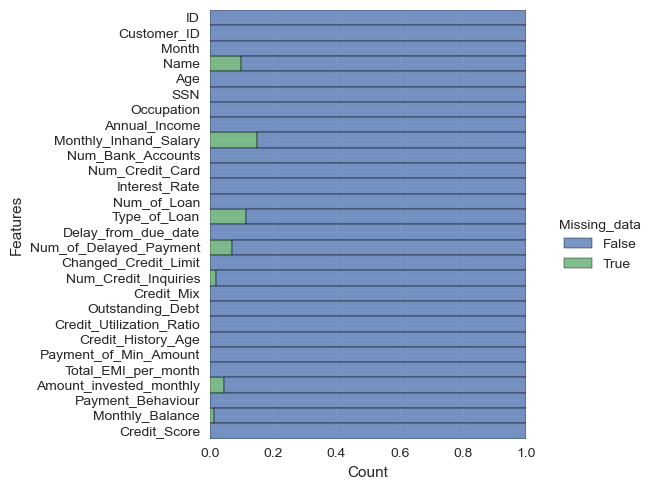

In [12]:
# Function to visualize missing value
def na_ratio_plot(df=df):
    sns.displot(df.toPandas().isna().melt(value_name='Missing_data',var_name='Features'),y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

na_ratio_plot()

### Target: Credit score distribution plot

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


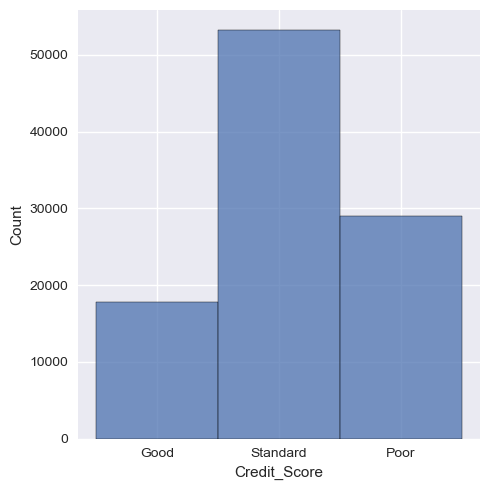

In [13]:
sns.displot(df.toPandas()["Credit_Score"])

### Distribution of attributes

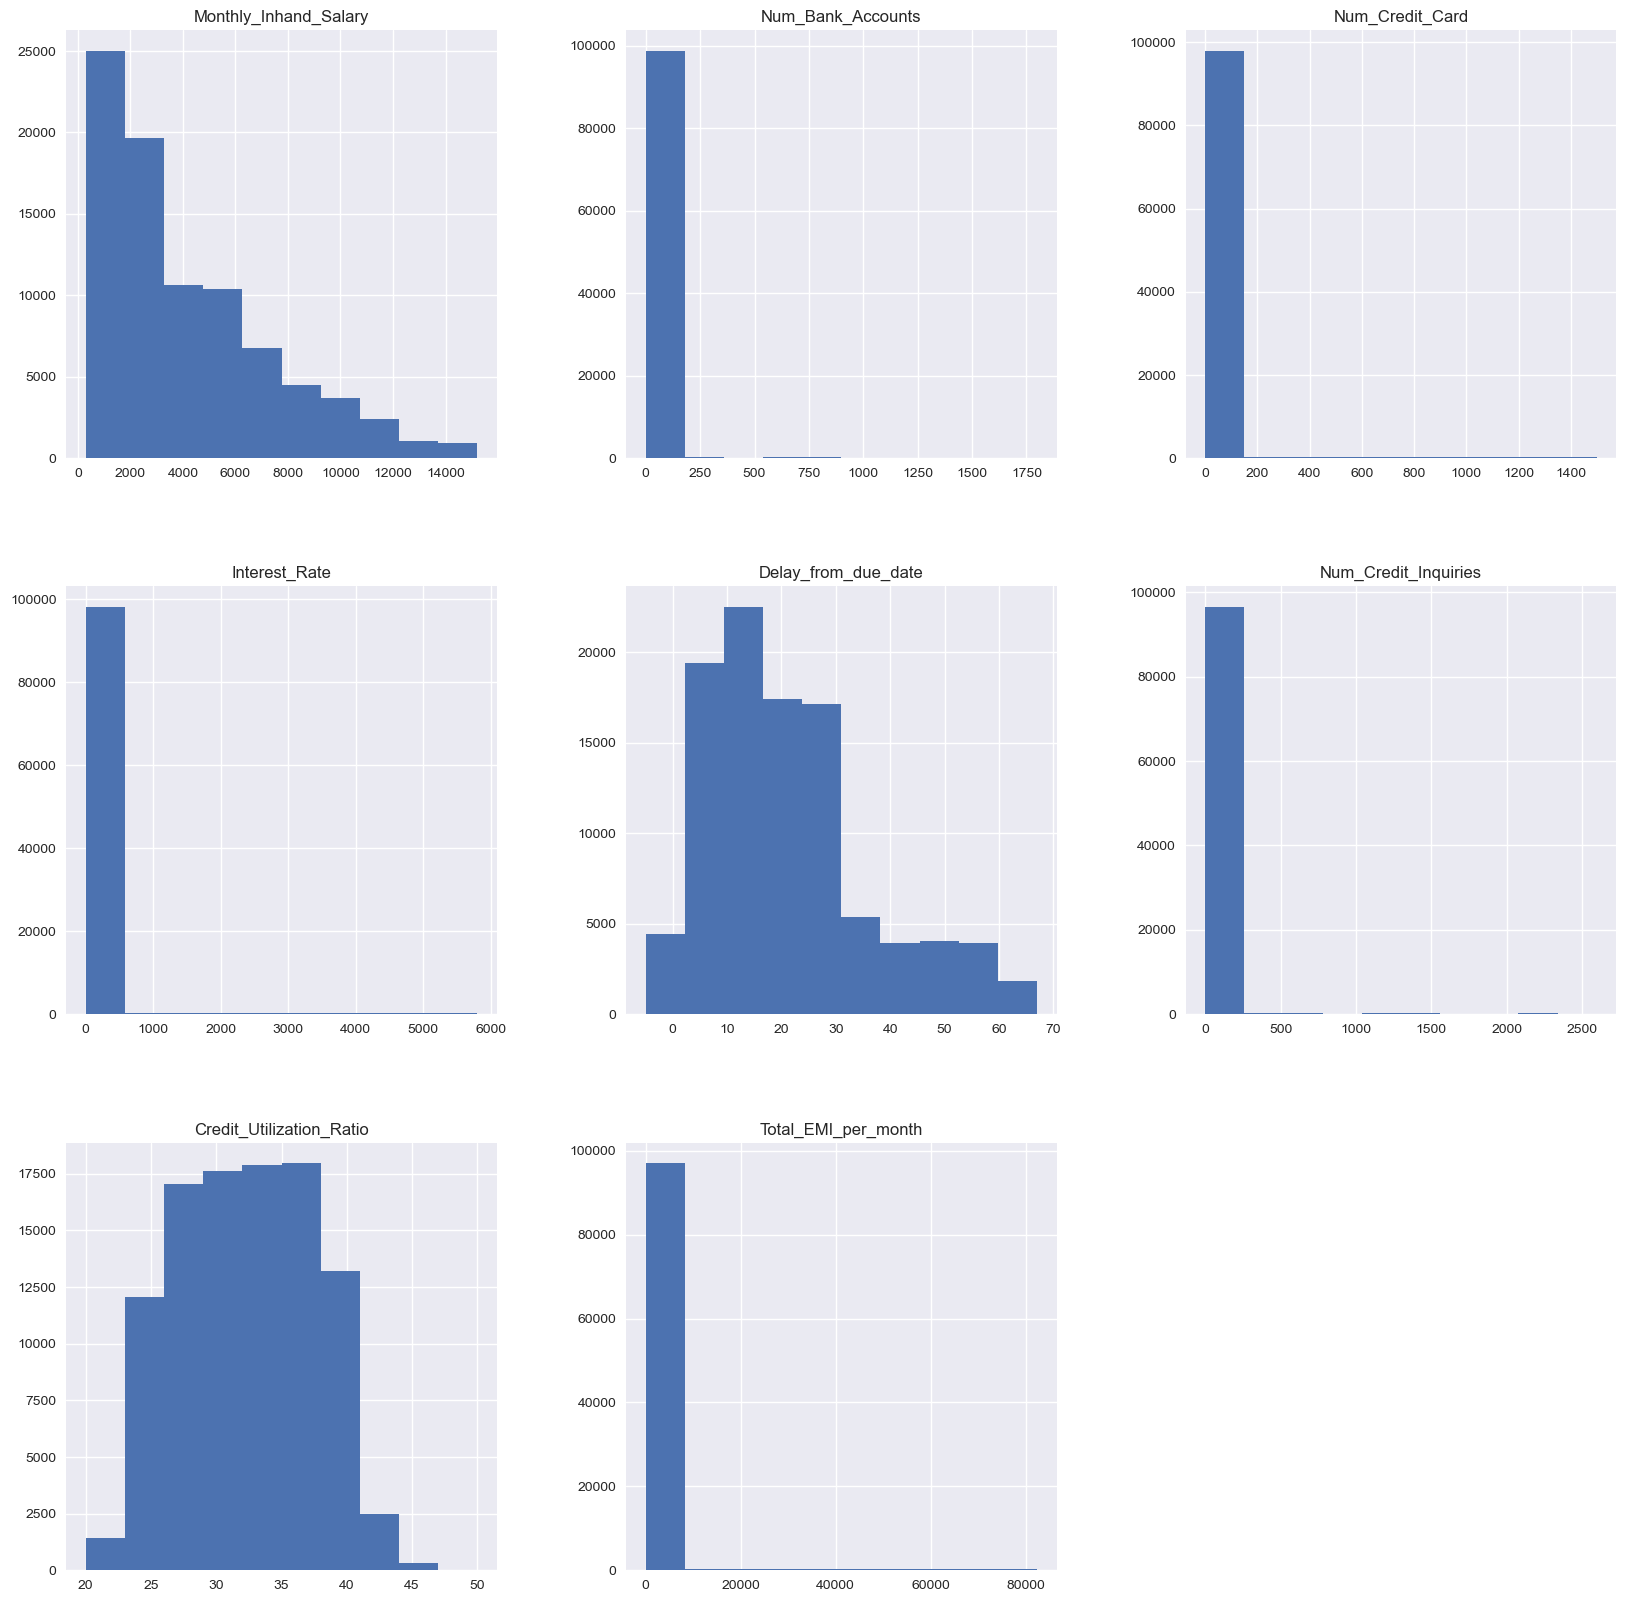

In [14]:
#See the distribution of each variable
df.toPandas().hist(figsize = (20, 20))
plt.show()

### Unique count

In [15]:
from pyspark.sql.functions import col, countDistinct

df.select([countDistinct(col(c)).alias(c) for c in df.columns]).show()


+------+-----------+-----+-----+----+-----+----------+-------------+---------------------+-----------------+---------------+-------------+-----------+------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+------------------+---------------------+-------------------+-----------------------+-----------------+---------------+------------+
|    ID|Customer_ID|Month| Name| Age|  SSN|Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|Payment_Behaviour|Monthly_Balance|Credit_Score|
+------+-----------+-----+-----+----+-----+----------+-------------+---------------------+-----------------+---------------+--------

##Preparing The Data For Machine Learning Algorithms

### Dropping columns ID, Customer_ID, Name, SSN
Reason being, too many unique values and not useful for training and testing. Will use Customer ID for reference

In [16]:
columns_to_drop = ["ID","Name","SSN"]
df = df.drop(*columns_to_drop)

In [17]:
df.columns

['Customer_ID',
 'Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

### Handle Invalid Data

#### Handle '_' invalid values

Looking at the dataset we notice that there are alot of weird values with '_' which affects the data that can be used.

In [18]:
#as most of the data with weird values has _ , we replace them with null and populate the dataset with the common values, we have to ignore payment behveius as it has legit _s
def replace_underscore_with_null(df):
    # Iterate through each column
    for col_name in df.columns:
        # Exclude 'Payment_Behaviour' from replacement
        if col_name not in ['Customer_ID','Payment_Behaviour']:
            # Replace values containing '_' with None
            df = df.withColumn(col_name, F.when(F.col(col_name).contains('_'), None).otherwise(F.col(col_name)))

    return df

df_cleaned_underscore = replace_underscore_with_null(df)

# Show the DataFrame with underscores replaced by null values
df_cleaned_underscore.show(30)

+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+------------------+------------+
|Customer_ID|   Month| Age|  Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|   Monthly_Balance|Credit_Score|
+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+----

#### Handle invalid payment_behaviour values

In [19]:
#As the Column Payment_Behaviours has some strange values like !@9#%8, we clear them and replace them with null
df_cleaned_underscore_weirdvalues = df_cleaned_underscore.withColumn('Payment_Behaviour', F.when(F.col('Payment_Behaviour').isin('!@9#%8'), None).otherwise(F.col('Payment_Behaviour')))
df_cleaned_underscore_weirdvalues.show(30)

+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+-----------+--------------------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+--------------------+---------------------+-------------------+-----------------------+--------------------+------------------+------------+
|Customer_ID|   Month| Age|  Occupation|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|        Type_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|Credit_Mix|Outstanding_Debt|Credit_Utilization_Ratio|  Credit_History_Age|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|   Monthly_Balance|Credit_Score|
+-----------+--------+----+------------+-------------+---------------------+-----------------+---------------+-------------+----

### Handle missing data



#### #Drop old missing values method

In [20]:
# from functools import reduce
# from pyspark.sql.functions import col, when

# def any_null(cols):
#     return reduce(lambda a, b: a | b, (col(c).isNull() for c in cols))

# rows_with_missing = df.filter(any_null(df.columns)).count()

# percentage_dropped = rows_with_missing / df.count() * 100
# print(f"Rows with missing values: {rows_with_missing}/ {df.count()}" )
# print(f"Percentage of missing values: {percentage_dropped}%")


# df_cleaned = df.dropna()

# print(f"Rows in cleaned DataFrame: {df_cleaned.count()}")


### Identifying Categorical and numerical columns

In [21]:
categorical = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
numerical = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
stages = []



### Transforming columns and data

#### Manually mapping

In [22]:
#helper function to change of all the values to integer
def map_values_to_int(df, column_name, mapping_dict):
    """
    Replace values in the specified column of a DataFrame with mapped integer values.

    Parameters:
    - df: PySpark DataFrame
    - column_name: Name of the column to be mapped
    - mapping_dict: Dictionary for mapping values to integers

    Returns:
    - df: PySpark DataFrame with the updated column
    """

    # Define a function to map values to integers based on the provided dictionary
    def map_to_int(value):
        return mapping_dict.get(value, None)

    # Create a UDF (User Defined Function) for mapping
    map_udf = F.udf(map_to_int, IntegerType())

    # Apply mapping to the specified column and create a new column with '_Int' suffix
    df_mapped = df.withColumn(column_name, map_udf(column_name))

    return df_mapped

In [29]:
# Define mapping dictionaries for each column
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8}
occupation_mapping = {'Scientist': 1, 'Musician': 2, 'Lawyer': 3, 'Teacher': 4, 'Developer': 5, 'Writer': 6,
                      'Architect': 7, 'Mechanic': 8, 'Entrepreneur': 9, 'Journalist': 10, 'Doctor': 11,
                      'Engineer': 12, 'Accountant': 13, 'Manager': 14}
credit_mix_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
payment_of_min_amount_mapping = {'No': 0, 'Yes': 1, 'NM': -1}
payment_behaviour_mapping = {'Low_spent_Small_value_payments': 1, 'High_spent_Small_value_payments': 2,
                             'Low_spent_Medium_value_payments': 3, 'High_spent_Medium_value_payments': 4,
                             'Low_spent_Large_value_payments': 5, 'High_spent_Large_value_payments': 6}
credit_score_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}


df_mapped = map_values_to_int(df_cleaned_underscore_weirdvalues, 'Month', month_mapping)
df_mapped = map_values_to_int(df_mapped, 'Occupation', occupation_mapping)
df_mapped = map_values_to_int(df_mapped, 'Credit_Mix', credit_mix_mapping)
df_mapped = map_values_to_int(df_mapped, 'Payment_of_Min_Amount', payment_of_min_amount_mapping)
df_mapped = map_values_to_int(df_mapped, 'Payment_Behaviour', payment_behaviour_mapping)



In [30]:
#All the values have been mapped to integer values
df_mapped.show(50)

Py4JJavaError: An error occurred while calling o731.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 26.0 failed 1 times, most recent failure: Lost task 0.0 in stage 26.0 (TID 86) (DESKTOP-339FDGT executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(DualStackPlainSocketImpl.java:135)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.PlainSocketImpl.accept(PlainSocketImpl.java:199)
	at java.net.ServerSocket.implAccept(ServerSocket.java:545)
	at java.net.ServerSocket.accept(ServerSocket.java:513)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 27 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4344)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3326)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4334)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4332)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3326)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3549)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:54)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:131)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(DualStackPlainSocketImpl.java:135)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.PlainSocketImpl.accept(PlainSocketImpl.java:199)
	at java.net.ServerSocket.implAccept(ServerSocket.java:545)
	at java.net.ServerSocket.accept(ServerSocket.java:513)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 27 more


#### Handle age values

In [ ]:
# cleaning the age column after all the string values have been mapped
from pyspark.sql.types import IntegerType

# Define a User-Defined Function (UDF) to clean the 'age' column
def clean_age(age_str):
    try:
        # Check if the string is a valid integer and does not contain additional underscores
        if age_str is not None and age_str.isdigit() and '_' not in age_str:
            age = int(age_str)

            # Check for a valid age range (e.g., between 0 and 100)
            if 0 <= age <= 100:
                return age
            else:
                return None
        else:
            return None
    except ValueError:
        # Handle non-convertible values
        return None



In [ ]:
# Register the UDF
clean_age_udf = F.udf(clean_age, IntegerType())

# Apply the UDF to the 'age' column
df_cleaned_age = df_mapped.withColumn('Age', clean_age_udf(F.col('Age')))

# Show the cleaned DataFrame
df_cleaned_age.show(50)


In [ ]:
df_cleaned_age.show()

#### Replace age missing values

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

def replace_null_with_mode(df, column_name):
    # Find the mode of the specified column
    mode_value = df.groupBy(column_name).count().orderBy(col("count").desc()).limit(1).select(column_name).collect()[0][0]

    # Replace null values with the mode for the specified column
    df = df.na.fill({column_name: mode_value})

    return df

dt_final = df_cleaned_age

df_final = replace_null_with_mode(df_final, 'Age')
df_final = replace_null_with_mode(df_final, 'Occupation')
df_final = replace_null_with_mode(df_final, 'Annual_Income')
df_final.show()



df_final = replace_null_with_mode(df_final , 'Occupation')
df_final = replace_null_with_mode(df_final , 'Annual_Income')
df_final = replace_null_with_mode(df_final , 'Monthly_Inhand_Salary')
df_final = replace_null_with_mode(df_final , 'Num_of_Loan')
df_final = replace_null_with_mode(df_final , 'Changed_Credit_Limit')
df_final = replace_null_with_mode(df_final , 'Num_Credit_Inquiries')
df_final = replace_null_with_mode(df_final , 'Credit_Mix')
df_final = replace_null_with_mode(df_final , 'Outstanding_Debt')
df_final.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean, col

def replace_null_with_mean(df, column_name):
    # Calculate the mean of the specified column
    mean_value = df.select(mean(col(column_name))).collect()[0][0]

    # Replace null values with the mean
    df = df.na.fill({column_name: mean_value})

    return df

#replace all with the mean
df_final = replace_null_with_mean(df_final, 'Amount_invested_monthly')
df_final = replace_null_with_mean(df_final, 'Payment_Behaviour')
df_final = replace_null_with_mean(df_final, 'Monthly_Balance')
df_final = replace_null_with_mean(df_final, 'Num_of_Delayed_Payment')

df_final.show()

#### Replace occupation missing values

In [ ]:
df_imputed = impute_missing_with_mode(df_imputed, 'Occupation', 'Customer_ID')
df_imputed.show()

#### Replace annual income missing value

In [ ]:
df_imputed = impute_missing_with_mode(df_imputed, 'Annual_Income', 'Customer_ID')
df_imputed.show()

#### Replace monthly inhand salary missing value

In [ ]:
df_imputed = impute_missing_with_mode(df_imputed, 'Monthly_Inhand_Salary', 'Customer_ID')
df_imputed.show()

#### Replace num of loan missing values

In [ ]:
df_imputed = impute_missing_with_mode(df_imputed, 'Num_of_Loan', 'Customer_ID')
df_imputed.show()

#### Replace Change credit limit missing values

In [ ]:
df_imputed = impute_missing_with_mode(df_imputed, 'Changed_Credit_Limit', 'Customer_ID')
df_imputed.show()

#### Num credit inquiries missing values

In [ ]:
df_imputed = impute_missing_with_mode(df_imputed, 'Num_Credit_Inquiries', 'Customer_ID')
df_imputed.show()


#### Replace credit mix missing values

In [ ]:
df_imputed = impute_missing_with_mode(df_imputed, 'Credit_Mix', 'Customer_ID')
df_imputed.show()

#### Replace outstanding debt missing values

In [ ]:
# df_imputed = impute_missing_with_mode(df_imputed, 'Outstanding_Debt', 'Customer_ID')

# df_imputed.show()

#### Check missing values

In [ ]:
df_imputed.select([count(when(col(c).isNull(), c)).alias(c) for c in df_imputed.columns]).show()

#### StringIndexer method

In [ ]:
# credit_data holds the transformed dataframe with all the indexed value
credit_data = df_cleaned

In [ ]:
# String indexer for all cat columns
for name in categorical:
    cat_indexer = StringIndexer(inputCol=name, outputCol= name + '_index')
    #cat_indexer = StringIndexer(inputCol='term', outputCol='term_index')
    cat_indexer_model = cat_indexer.fit(credit_data)
    credit_data = cat_indexer_model.transform(credit_data)

In [ ]:
print(f'All Columns:{credit_data.columns}')
print(f"Dropping {len(categorical)} old non-index categorical columns....")
credit_data = credit_data.drop(*categorical)
print(f"\nUpdated Columns: {credit_data.columns}")

In [ ]:
credit_data.show()

### Convert Numerical columns to integer

#### Clean all numerical columns


1.   Clean values appended with "_"
2.   Handle outliers value, eg: Age = 500



In [ ]:
# from pyspark.sql.types import IntegerType

# def convert_to_int(value):
#     if int(value) == int:
#       return int(value)
#     elif float(value) == float:
#       return float(value)
#     else:
#       return None

# for name in numerical:
#       credit_data = credit_data.withColumn(name, F.udf(convert_to_int, IntegerType())(credit_data[name]))

# credit_data.show()

#### Cast the numerical columns

In [ ]:
print("Before update:")
print(credit_data.printSchema())

for name in numerical:
    credit_data = credit_data.withColumn(name, credit_data[name].cast('int'))

print("After update:")
print(credit_data.printSchema())


In [ ]:
label_stringIdx = StringIndexer(inputCol = 'Credit_Score_index', outputCol = 'label')

In [ ]:
credit_data.show()

In [ ]:
print(credit_data.toPandas().isna().sum())

credit_data = credit_data.dropna(how = "any")
print(credit_data.toPandas().isna().sum())


credit_data.show()

### Save df for fine-tuning model

In [ ]:
fine_tuning_df = credit_data

fine_tuning_df.printSchema()

### Vector Assembler for all features

In [ ]:
assemblerInputs = [c + "_index" for c in categorical] + numerical
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="featuresNotScaled")

### Scale the vector column

In [ ]:
stdscaler = StandardScaler(inputCol="featuresNotScaled", outputCol="features", withStd=True, withMean=False)

### Apply Transformers/Estimators to Pipeline

In [ ]:
stages = []

stages += [label_stringIdx]
stages += [assembler]
stages += [stdscaler]
print(stages)

In [ ]:
credit_data.show()

In [ ]:
pipeline = Pipeline(stages = stages)
pipeline_model = pipeline.fit(credit_data)
credit_data = pipeline_model.transform(credit_data)

In [ ]:
selected = ['label', 'features']
credit_data = credit_data.select(selected)
credit_data.printSchema()


### Stratified Sampling based on 'LoadNumType'
Get samples from each load type

- Training: 4/5
- Testing: 1/5

In [ ]:
#See initial distribution of the 3 credit score
credit_data.groupBy('label').count().show()

In [ ]:
#Take 2/3 of the data from each load type into training set
train_data = credit_data.sampleBy("label", fractions = {0.0: 4/5, 1.0: 4/5, 2.0: 4/5}, seed =  42)

#Subtracting the train_data from the original data to get the test set (remaining samples)
test_data = credit_data.subtract(train_data)

In [ ]:
#See the no. of samples of each load type in training set
train_data.groupBy('label').count().show()

In [ ]:
#See the no. of samples of each load type in testing set
test_data.groupBy('label').count().show()

In [ ]:
# See the distribution of data in original set
print("Original dataset distribution:")
credit_data.select('label').toPandas().hist()
plt.show()

# See the distribution of data in training set
print("Training dataset distribution:")
train_data.select('label').toPandas().hist()
plt.show()

# See the distribution of data in testing set
print("Testing dataset distribution:")
test_data.select('label').toPandas().hist()
plt.show()


-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

### #View Invalid data


In [ ]:
# invalidPB_df = df.filter(F.col("Occupation") == "_______")
# invalidPB_df.show()
# invalidPB_df.count()



### #Binning


In [ ]:
# # Convert "age_string" to integer
# # df_with_numeric_age = df.withColumn("age_numeric", cast(col("age_string"), IntegerType()))
# from pyspark.sql.types import *
# from pyspark.sql.functions import col


# target_types = [IntegerType(), DoubleType(), DoubleType()]  # Example types
# new_df = df.select([(F.col(c).cast(target_types[i]) if F.col(c).dataType in (StringType(), IntegerType()) else col(c)) for i, c in enumerate(df.columns)])

# # Show results
# new_df.describe()

### #String indexer (Old Code)

In [ ]:
# #Convert string type columns into numeric index

# from pyspark.ml.feature import StringIndexer
# from pyspark.ml.feature import VectorAssembler
# from pyspark.sql.functions import col

# # "Type_of_Loan" gives me issues suspect cause of missing values

# print(df.describe())

# dfTransformed = df_cleaned

# all_cols = df.schema.names
# numeric_cols = [col for col in all_cols if df.schema[col].dataType in ("int", "double")]
# non_numeric_cols = [col for col in all_cols if col not in numeric_cols]


# # non_numeric_cols = ['Occupation', 'Month', 'Credit_History_Age', 'Payment_Behaviour', 'Credit_Score', 'Credit_Mix', 'Payment_of_Min_Amount', 'Age']

# df_cleaned

# print(numeric_cols)
# print(non_numeric_cols)



# numColumnAppended = []
# for item in non_numeric_cols:
#   numColumnAppended.append(item + "_NUM")

# print(numColumnAppended)

# # #Creates new columns (numeric)
# stringIndex = StringIndexer(inputCols = non_numeric_cols,
#                             outputCols = numColumnAppended)

# # #Add in the new (numeric) columns
# stringIndex_model = stringIndex.fit(dfTransformed)

# dfTransformed = stringIndex_model.transform(dfTransformed)

# dfTransformed = dfTransformed.drop(*non_numeric_cols)

# dfTransformed.show()

### Vector Assembler (Old code)
Concatenates all the features into a single vector which can be passed to the estimator/ML algo
- Features are merged into 1 column to make a vector in each row: under 'features' column


In [ ]:
# #All features except target: 'LoadTypeNum'
# vector_assembler = VectorAssembler(inputCols = dfTransformed.columns[0:-1],
#                                    outputCol = 'features')

# vector_df = vector_assembler.transform(dfTransformed).select('features', 'Credit_Score_NUM')

# #truncate = False to see the whole data (no ...)
# vector_df.show(5, truncate = False)

##Machine learning algorithms

1. Decision tree
2. Logistic regression
3. Random forest

In [ ]:
#Multiclass Classification - accuracy, precision, recall, F1
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

accuracy_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                                  metricName = 'accuracy')

precision_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                                   metricName = 'precisionByLabel')

recall_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                                metricName = 'recallByLabel')

f1_eval = MulticlassClassificationEvaluator(labelCol = 'label',
                                            metricName = 'f1')


#Binary Classification - AUC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol = 'label',
                                          rawPredictionCol = 'prediction',
                                          metricName = 'areaUnderROC')

#Function to print all the metrics based on each model's predictions
def print_metrics(predictions):

    print("Metrics:")

    accuracy = accuracy_eval.evaluate(predictions)
    print(f'Accuracy: {(accuracy * 100):.3f}')
    print(f'Test Error: {((1.0 - accuracy) * 100):.3f}')

    precision = precision_eval.evaluate(predictions)
    print(f'Precision: {precision:.3f}')

    recall = recall_eval.evaluate(predictions)
    print(f'Recall: {recall:.3f}')

    f1 = f1_eval.evaluate(predictions)
    print(f'F1: {f1:.3f}')

    auc = evaluator.evaluate(predictions)
    print(f'Test Area Under ROC: {auc:.3f}')

##Train models

### Classification model - Decision Tree
- Instantiate a DecisionTreeClassifier model object from SparkMLlib
- Train the model using the training dataset
- Evaluate the model using the testing dataset

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

#labelCol ('LoadTypeNum') || featuresCol ('features')
dt = DecisionTreeClassifier(labelCol = 'label',
                            featuresCol = 'features')

#Train the DT model
print(train_data.columns)


fittedDT = dt.fit(train_data)

#Apply the model to the test dataset & see the predictions
#Actual: LoadTypeNum || Predicted: predictions
predictionsDT = fittedDT.transform(test_data)
print_metrics(predictionsDT)

-------------------------------------------------------------------------------------------------------------------------------

### Classification model - Logistic Regression
- Instantiate a LogisticRegression model object from SparkMLlib
- Train the model using the training dataset
- Evaluate the model using the testing dataset

In [ ]:
from pyspark.ml.classification import LogisticRegression

#labelCol ('LoadTypeNum') || featuresCol ('features')
lr = LogisticRegression(labelCol = 'label',
                        featuresCol = 'features')

#Train the DT model
fittedLR = lr.fit(train_data)

#Apply the model to the test dataset & see the predictions
#Actual: LoadTypeNum || Predicted: predictions
predictionsLR = fittedLR.transform(test_data)
print_metrics(predictionsLR)

### Classification model - Random Forest
- Instantiate a RandomForestClassifier model object from SparkMLlib
- Train the model using the training dataset
- Evaluate the model using the testing dataset

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

#labelCol ('LoadTypeNum') || featuresCol ('features')
rf = RandomForestClassifier(labelCol = 'label',
                            featuresCol = 'features')

#Train the DT model
fittedRF = rf.fit(train_data)

#Apply the model to the test dataset & see the predictions
#Actual: LoadTypeNum || Predicted: predictions
predictionsRF = fittedRF.transform(test_data)
print_metrics(predictionsRF)

##Fine-tune the models

### Fine-tuning helper functions
- Define a user-defined transformer function to add a new feature (CO2_Emit)
- Define a fine-tuning function that can:
    - Select the best hyperparameters for a model from a parameter grid
    - Tune the model with/without the new feature(CO2_Emit) based on parameter specified
    - Evaluate the performance of the tuned model

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.sql.functions import udf
from pyspark.ml.tuning import TrainValidationSplit

# Defining a helper function to check deb to income ratio, in general the lower the ratio the better
def debt_to_income_ratio(debt, income):
    return debt / income if income > 0 else 0.0


# Defining a user-defined transform function to add a new feature to the existing dataframe
def DTI_AttributeAdder(df):
      # Register a UDF to be executed on dataframe
      DTI_Emit = udf(lambda x1, x2: debt_to_income_ratio(x1, x2), T.DoubleType())
      spark.udf.register("DTI_Emit", DTI_Emit)
      return df.withColumn('DTI_Emit', DTI_Emit('Outstanding_Debt', 'Annual_Income'))

def finetuning_improved(model, paramGrid, evaluator, train_data, test_data):
      # Instantiate TrainValidationSplit to apply cross-validation during fine-tuning
      print("Starting trainValidation Split")
      tvs = TrainValidationSplit(estimator = model,
                               estimatorParamMaps = paramGrid,
                               evaluator = evaluator,
                               parallelism = 1,
                               seed = 42)

      print("Fitting trainValidation Split with train data")

      # Train the model using the training set find the best parameters for the model from the parameter grid
      tvsModel = tvs.fit(train_data)
      best_model = tvsModel.bestModel

      print("Fitting trainValidation Split with test data")
      # Display tuned model's performance
      tuned_predictions = best_model.transform(test_data)

      print(f"Tuned predictions for {model}:")
      print()
      print_metrics(tuned_predictions)

### No new attribute added for fine tuning

In [ ]:
noAttributeTrainData = train_data
noAttributeTestData = test_data

### New attribute test and train dataset

In [ ]:
df_cleaned = fine_tuning_df
df_cleaned = DTI_AttributeAdder(df_cleaned)

newAttribute_credit_data = df_cleaned

newAttribute_label_stringIdx = StringIndexer(inputCol = 'Credit_Score_index', outputCol = 'label')

newAttribute_assemblerInputs = [c + "_index" for c in categorical] + numerical
newAttribute_assembler = VectorAssembler(inputCols=newAttribute_assemblerInputs, outputCol="featuresNotScaled")

newAttribute_stdscaler = StandardScaler(inputCol="featuresNotScaled", outputCol="features", withStd=True, withMean=False)

newAttribute_stages = []
newAttribute_stages += [newAttribute_label_stringIdx]
newAttribute_stages += [newAttribute_assembler]
newAttribute_stages += [newAttribute_stdscaler]

newAttribute_pipeline = Pipeline(stages = newAttribute_stages)
newAttribute_pipeline_model = pipeline.fit(newAttribute_credit_data)
newAttribute_credit_data = pipeline_model.transform(newAttribute_credit_data)

withAttributeTrain_data = credit_data.sampleBy("label", fractions = {0.0: 4/5, 1.0: 4/5, 2.0: 4/5}, seed =  42)
withAttributeTest_data = credit_data.subtract(withAttributeTrain_data)



In [ ]:
withAttributeTrain_data.show()

### Fine-tuning Decision Tree
- Define parameter grid
- Apply finetuning function to tune the model

In [ ]:
# Define parameter grid
paramGrid = ParamGridBuilder()\
            .addGrid(dt.impurity, ['gini', 'entropy'])\
            .addGrid(dt.maxBins, [10, 20])\
            .addGrid(dt.maxDepth, [2, 5])\
            .build()

In [ ]:

# Fine-tuning the model with new attribute CO2_Emit
print("Model performance with new attribute added: ")
finetuning_improved(model = dt, paramGrid = paramGrid, evaluator = evaluator, train_data = withAttributeTrain_data, test_data = withAttributeTest_data)

# Fine-tuning the model without new attributes
print()
print("Model performance without new attribute added: ")
finetuning_improved(model = dt, paramGrid = paramGrid, evaluator = evaluator, train_data = noAttributeTrainData, test_data = noAttributeTestData)

-------------------------------------------------------------------------------------------------------------------------------

##Outcome evaluation